In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("./Data/Breast Cancer.csv")
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
data.isnull().any()

Age               False
BMI               False
Glucose           False
Insulin           False
HOMA              False
Leptin            False
Adiponectin       False
Resistin          False
MCP.1             False
Classification    False
dtype: bool

In [4]:
#1.1Áp dụng PCA để giảm xuống còn k chiều (2 < k)

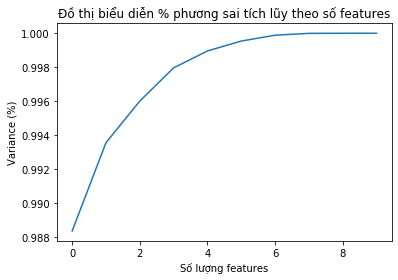

In [5]:
#chon k dua tren do thi bieu dien phuong sai tich luy
pca = PCA().fit(data)

# Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Số lượng features')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features')
plt.show()

Nhận xét:

f =  0: giữ lại    0%  phương sai so với dữ liệu gốc

f =  1: giữ lại ~ 99.4%  phương sai so với dữ liệu gốc

f >  1: giữ lại > 99.4%  phương sai so với dữ liệu gốc

f = 9 : giữ lại   100% phương sai so với dữ liệu gốc

In [6]:
print('Phân tích chi tiết theo k:')
for k in range(1, 10):
    pca = PCA(k)
    pca.fit(data)
      
    var = pca.explained_variance_ratio_.sum() * 100
    print('   * k = %2d' %k, '--> phương sai tích lũy %.0f%%' %var)

    # Test - BEGIN
    print('- Chuyển vị của ma trận vectơ riêng P_T', pca.components_.shape, ': \n', 
                                                     pca.components_, '\n')
    print('- Ma trận trị riêng LAMBDA', pca.explained_variance_.shape, ': \n', 
                                        pca.explained_variance_, '\n')   

Phân tích chi tiết theo k:
   * k =  1 --> phương sai tích lũy 99%
- Chuyển vị của ma trận vectơ riêng P_T (1, 10) : 
 [[ 6.41520052e-04  3.25417927e-03  1.73255751e-02  5.09492460e-03
   2.74181432e-03  8.09589230e-04 -3.97450515e-03  1.31477784e-02
   9.99732971e-01  1.32684806e-04]] 

- Ma trận trị riêng LAMBDA (1,) : 
 [119719.26694485] 

   * k =  2 --> phương sai tích lũy 99%
- Chuyển vị của ma trận vectơ riêng P_T (2, 10) : 
 [[ 6.41520052e-04  3.25417927e-03  1.73255751e-02  5.09492460e-03
   2.74181432e-03  8.09589230e-04 -3.97450515e-03  1.31477784e-02
   9.99732971e-01  1.32684806e-04]
 [ 2.22593289e-01  6.24637494e-02  7.72538436e-01  2.18607833e-01
   9.89482805e-02  5.16480377e-01 -3.86208825e-02  1.53512506e-01
  -1.77112843e-02  5.60298920e-03]] 

- Ma trận trị riêng LAMBDA (2,) : 
 [119719.26694485    630.3621429 ] 

   * k =  3 --> phương sai tích lũy 100%
- Chuyển vị của ma trận vectơ riêng P_T (3, 10) : 
 [[ 6.41520052e-04  3.25417927e-03  1.73255751e-02  5.09492460

Nguyên nhân hay cơ sở về số chiều được giảm: chọn k sao cho phương sai tích lũy được giữ lại mang tính đặc trưng so với dữ liệu gốc. Theo phân tích phương sai tích lũy trên thì với k = 2, 100% phương sai tích lũy được giữ lại so với dữ liệu gốc.

In [7]:
pca.explained_variance_

array([1.19719267e+05, 6.30362143e+02, 2.97051395e+02, 2.37259351e+02,
       1.20574000e+02, 7.07834031e+01, 4.17150798e+01, 1.31346258e+01,
       6.90136629e-01])

In [8]:
pca.explained_variance_ratio_

array([9.88345332e-01, 5.20397007e-03, 2.45231505e-03, 1.95870037e-03,
       9.95401598e-04, 5.84354113e-04, 3.44379860e-04, 1.08433224e-04,
       5.69743980e-06])

Dựa trên explained_variance_ratio, có thể thấy được với k=1, độ biến thiên của dữ liệu trước và sau khi giảm chiều gần như tương đương (98%), tiếp đó với k >= 2, độ biến thiên của dữ liệu càng tiến gần 100% so với dữ liệu gốc.

In [9]:
#1.3 Giam chieu xuong con k=2 va truc quan hoa du lieu

- Ma trận B_T (116, 2)
   Component 1  Component 2
0  -118.146799   -33.747671
1   -66.126070   -10.358435
2    19.768147    -7.549560
3   393.026588   -31.560122
4   239.018536   -15.048337 



<Figure size 576x432 with 0 Axes>

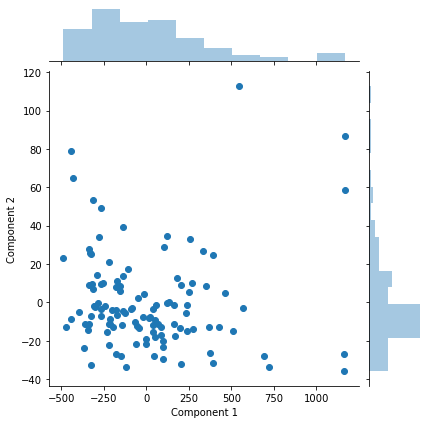

In [10]:
k   = 2
pca = PCA(k)
pca.fit(data)

# transform data
B = pca.transform(data)
print('- Ma trận B_T', B.shape)

principalDf = pd.DataFrame(data = B, columns = ['Component 1', 'Component 2'])
print(principalDf.head(), '\n')

plt.figure(figsize = (8, 6))
sns.jointplot(x = 'Component 1', y = 'Component 2', data = principalDf)              
plt.show()

Nhận xét: dựa trên biểu đồ trên, ta thấy được có sự tương quan nghịch giữa component 1 và component 2, tập dữ liệu có outliers nằm ở góc phải biểu đồ.